In [2]:
import pandas as pd

fonte = "MICRODADOS_ENEM_2019.csv"

dados = pd.read_csv(fonte)

provas = ["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_REDACAO"]

In [3]:
dados.query("NU_IDADE == 13")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,...,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,...,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,...,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,...,B,A,A,D,A,B,C,B,C,B


In [8]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts()

PE    18
CE    15
BA    14
PA    12
MG    11
SP    11
MA     9
PI     7
GO     7
PB     7
MT     4
AM     4
DF     4
TO     3
SE     3
PR     3
AL     2
RO     2
SC     2
AP     1
RN     1
ES     1
AC     1
RS     1
RJ     1
MS     1
Name: SG_UF_RESIDENCIA, dtype: int64

In [10]:
#deixa os valores entre um intervalo de 0 e 1
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize=True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
MG    0.075862
SP    0.075862
MA    0.062069
PI    0.048276
GO    0.048276
PB    0.048276
MT    0.027586
AM    0.027586
DF    0.027586
TO    0.020690
SE    0.020690
PR    0.020690
AL    0.013793
RO    0.013793
SC    0.013793
AP    0.006897
RN    0.006897
ES    0.006897
AC    0.006897
RS    0.006897
RJ    0.006897
MS    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

<Axes: >

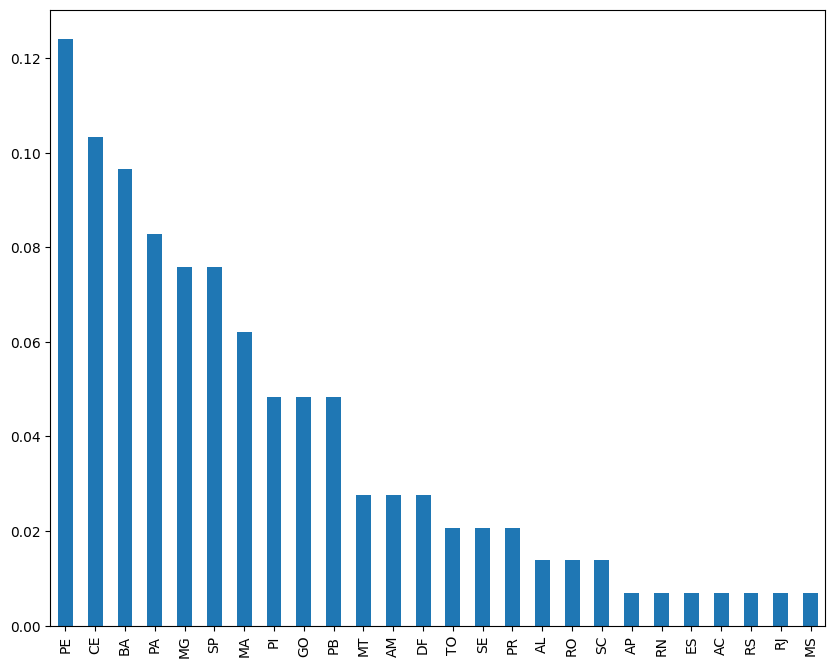

In [16]:
alunos_menor_quatorze = dados.query("NU_IDADE <= 14")
alunos_menor_quatorze["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10, 8))


In [18]:
len(alunos_menor_quatorze) 

145

Desafio 
Pegar a amostra completa dos alunos 13 e 14 anos
Aumentar a amostra para alunos menor de idade compara a proporção por estados 

<Axes: xlabel='Q006', ylabel='NU_NOTA_MT'>

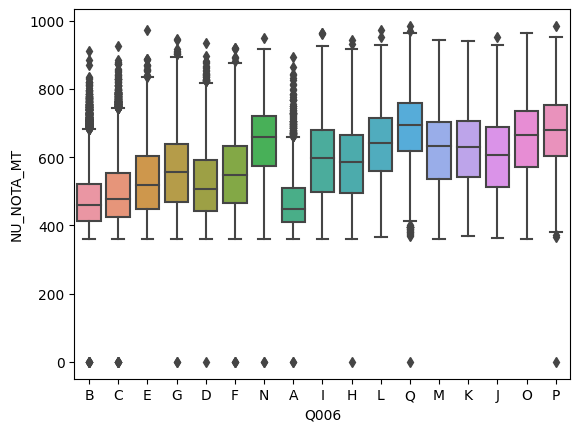

In [28]:
import seaborn as sns 
#import matplotlib.pylot as plt

#plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y="NU_NOTA_MT", data= dados)
#plt.title("Bloxplot das notas de matematica pela renda")

In [29]:
renda_ordenada = dados["Q006"].unique()

renda_ordenada.sort()

renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

<Axes: xlabel='Q006', ylabel='NU_NOTA_MT'>

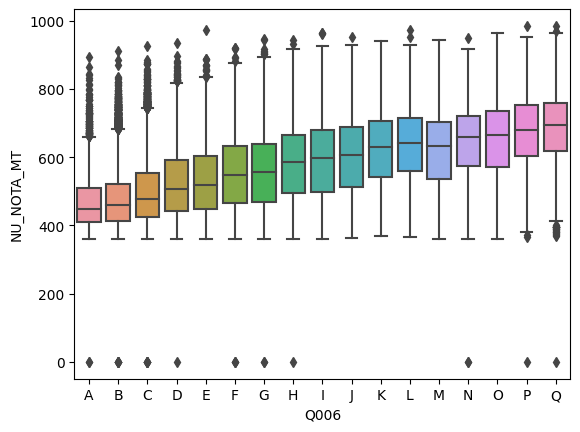

In [31]:
sns.boxplot(x="Q006", y="NU_NOTA_MT", data = dados, order=renda_ordenada)

In [33]:
dados[provas].sum()

NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_CH         49743676.1
NU_NOTA_CN         44334986.1
NU_NOTA_REDACAO    56038440.0
dtype: float64

In [35]:
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head() 

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


desafio criar uma função para plotar o boxplot do seaborn

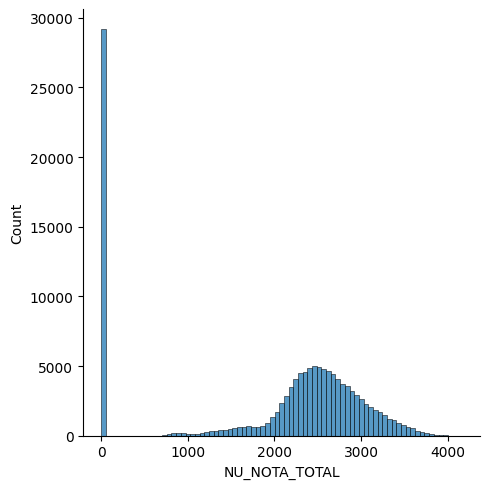

In [36]:
sns.displot(dados, x ="NU_NOTA_TOTAL")

In [43]:
#não foram fazer a provar por isso ta NaN
provas = ["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_REDACAO"]
provas.append("NU_NOTA_TOTAL")

dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


desafio 
    Verificar se quem zerou foi eleminado ou não estava presente

    Quem é eliminado tira zero ou NaN(não teve registro de notas)

    verificar quem tem carro se foi as que não foram as faltaram os dias de provas

In [45]:
dados_sem_nota_zero = dados[provas].query("NU_NOTA_TOTAL != 0")
dados_sem_nota_zero.head()

,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,432.4,488.6,512.3,435.6,420.0,2288.9
1,NaN,375.3,409.3,NaN,400.0,1184.6
2,427.2,441.0,499.1,423.2,560.0,2350.5
3,499.9,551.5,578.1,426.2,500.0,2555.7
4,424.5,511.2,571.3,516.5,780.0,2803.5


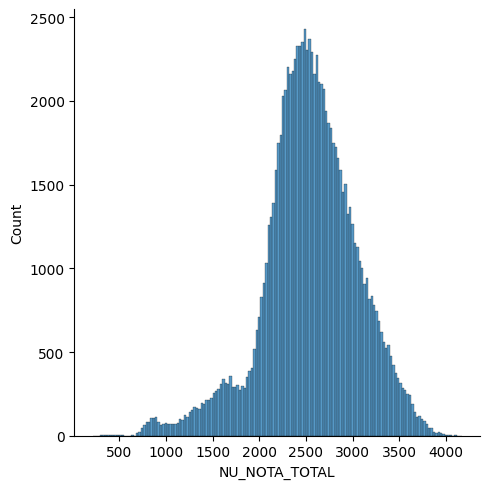

In [47]:
sns.displot(dados_sem_nota_zero, x ="NU_NOTA_TOTAL")

In [53]:
sns.boxplot(x="Q006", y="NU_NOTA_MT", data = dados_sem_nota_zero, order=renda_ordenada)

ValueError: Could not interpret input 'Q006'

Arrumar o erro e importar o matplotlib.pylot
e terminar de ver o video [1:09:00]